In [2]:
%pip install plotly

  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
%pip install --upgrade nbformat

  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.5 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/88.5 kB ? eta -:--:--
   ---------------------------------------- 88.5/88.5 kB 2.5 MB/s eta 0:00:00
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
   ---------------------------------------- 0.0/211.7 kB ? eta -:--:--
   ----------------------- ---------------- 122.9/211.7 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 211.7/211.7 kB 4.4 MB/s eta 0:0


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

# Create Dataframe for Dataset

In [2]:
# Initiate dataframe
df = pd.DataFrame(columns=['path','label'])

# Create lists to hold data before converting to a DataFrame
data = []

# Loop over fire images and label them 1
for dirname, _, filenames in os.walk('./fire_dataset/fire_images'):
    for filename in filenames:
        data.append([os.path.join(dirname, filename), 'fire'])

# Loop over non fire images and label them 0
for dirname, _, filenames in os.walk('./fire_dataset/non_fire_images'):
    for filename in filenames:
        data.append([os.path.join(dirname, filename), 'non_fire'])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['path', 'label'])

# Shuffle the dataset to redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)

# Display the first 10 rows of the DataFrame
print(df.head(10))

                                              path     label
0  ./fire_dataset/non_fire_images\non_fire.188.png  non_fire
1  ./fire_dataset/non_fire_images\non_fire.135.png  non_fire
2          ./fire_dataset/fire_images\fire.683.png      fire
3          ./fire_dataset/fire_images\fire.309.png      fire
4          ./fire_dataset/fire_images\fire.728.png      fire
5          ./fire_dataset/fire_images\fire.707.png      fire
6  ./fire_dataset/non_fire_images\non_fire.287.png  non_fire
7          ./fire_dataset/fire_images\fire.236.png      fire
8  ./fire_dataset/non_fire_images\non_fire.185.png  non_fire
9          ./fire_dataset/fire_images\fire.633.png      fire


# Dataset Distribution

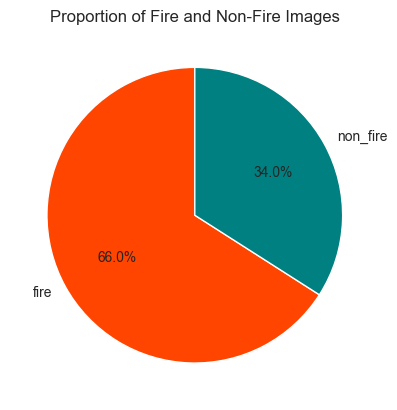

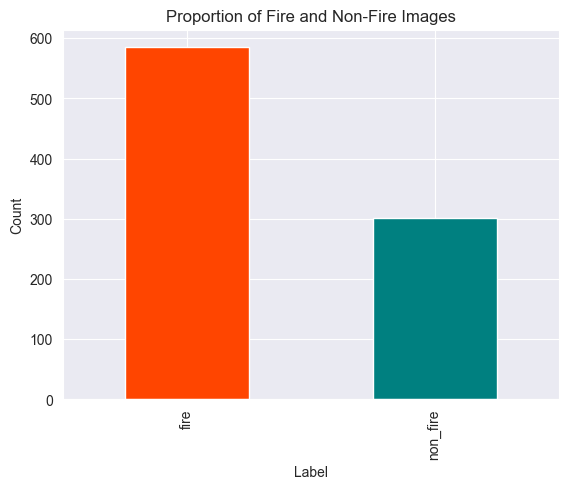

In [3]:
# Pie chart to show the proportion of fire and non-fire images
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['orangered', 'teal'])
plt.title('Proportion of Fire and Non-Fire Images')
plt.ylabel('')
plt.show()

# Bar chart to show the proportion of fire and non-fire images
df['label'].value_counts().plot(kind='bar', color=['orangered', 'teal'])
plt.title('Proportion of Fire and Non-Fire Images')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Fire images sample

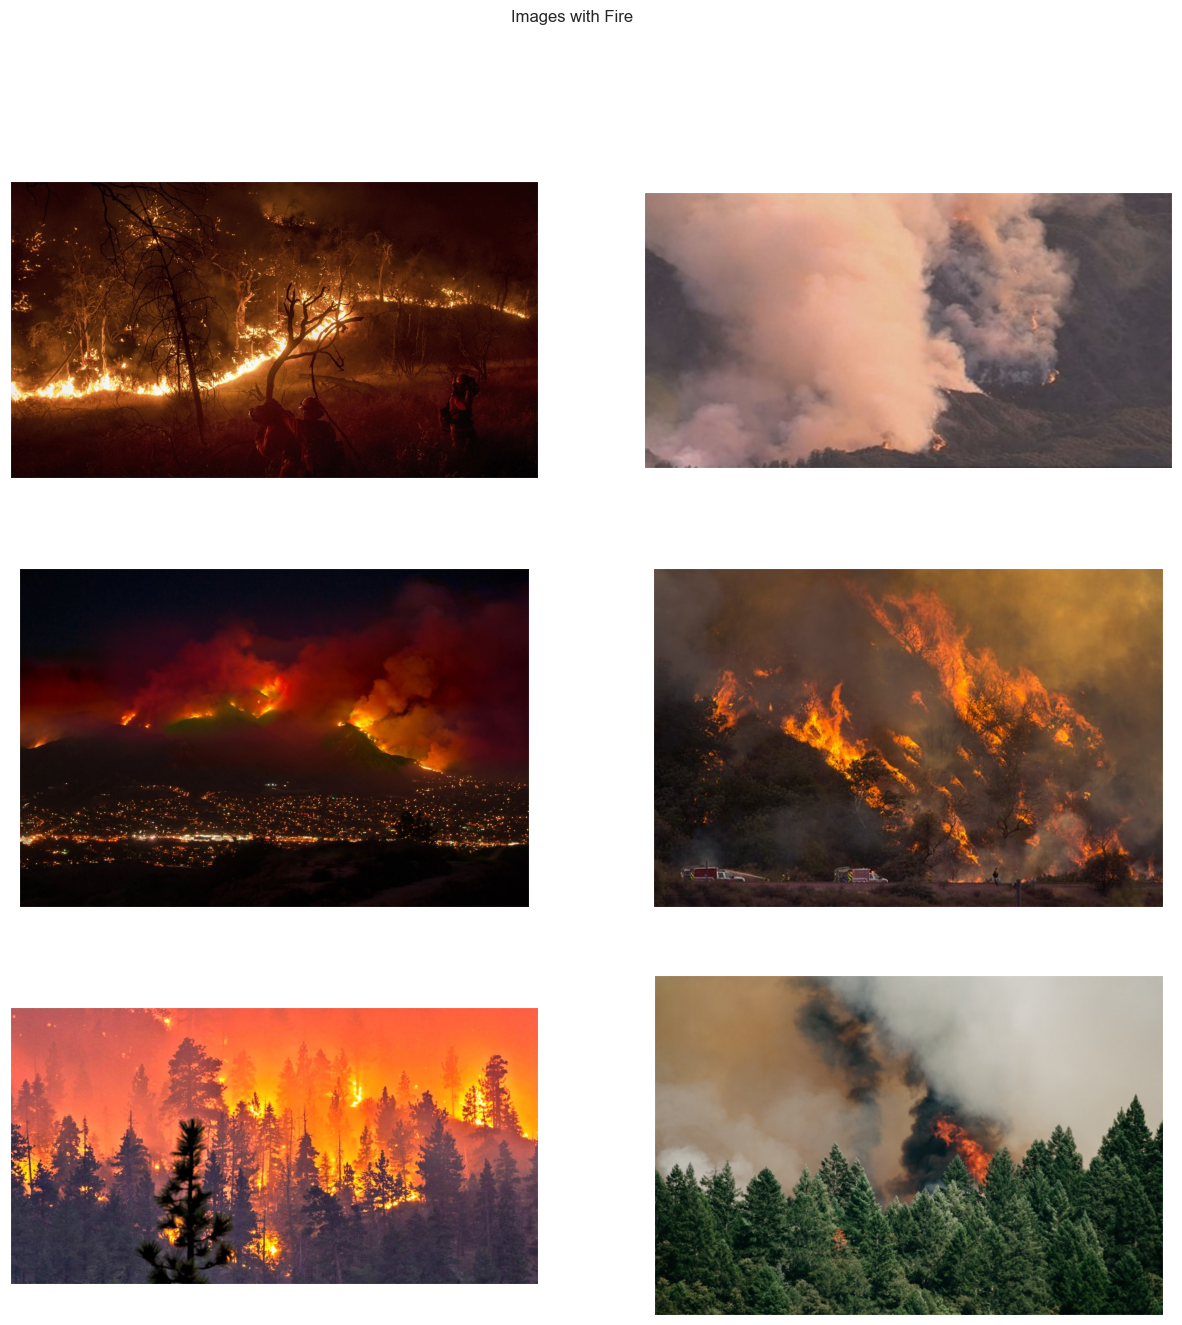

In [4]:
label = 'fire' 
data = df[df['label'] == label]
sns.set_style('dark')

pics = 6 
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

Non Fire Images Sample

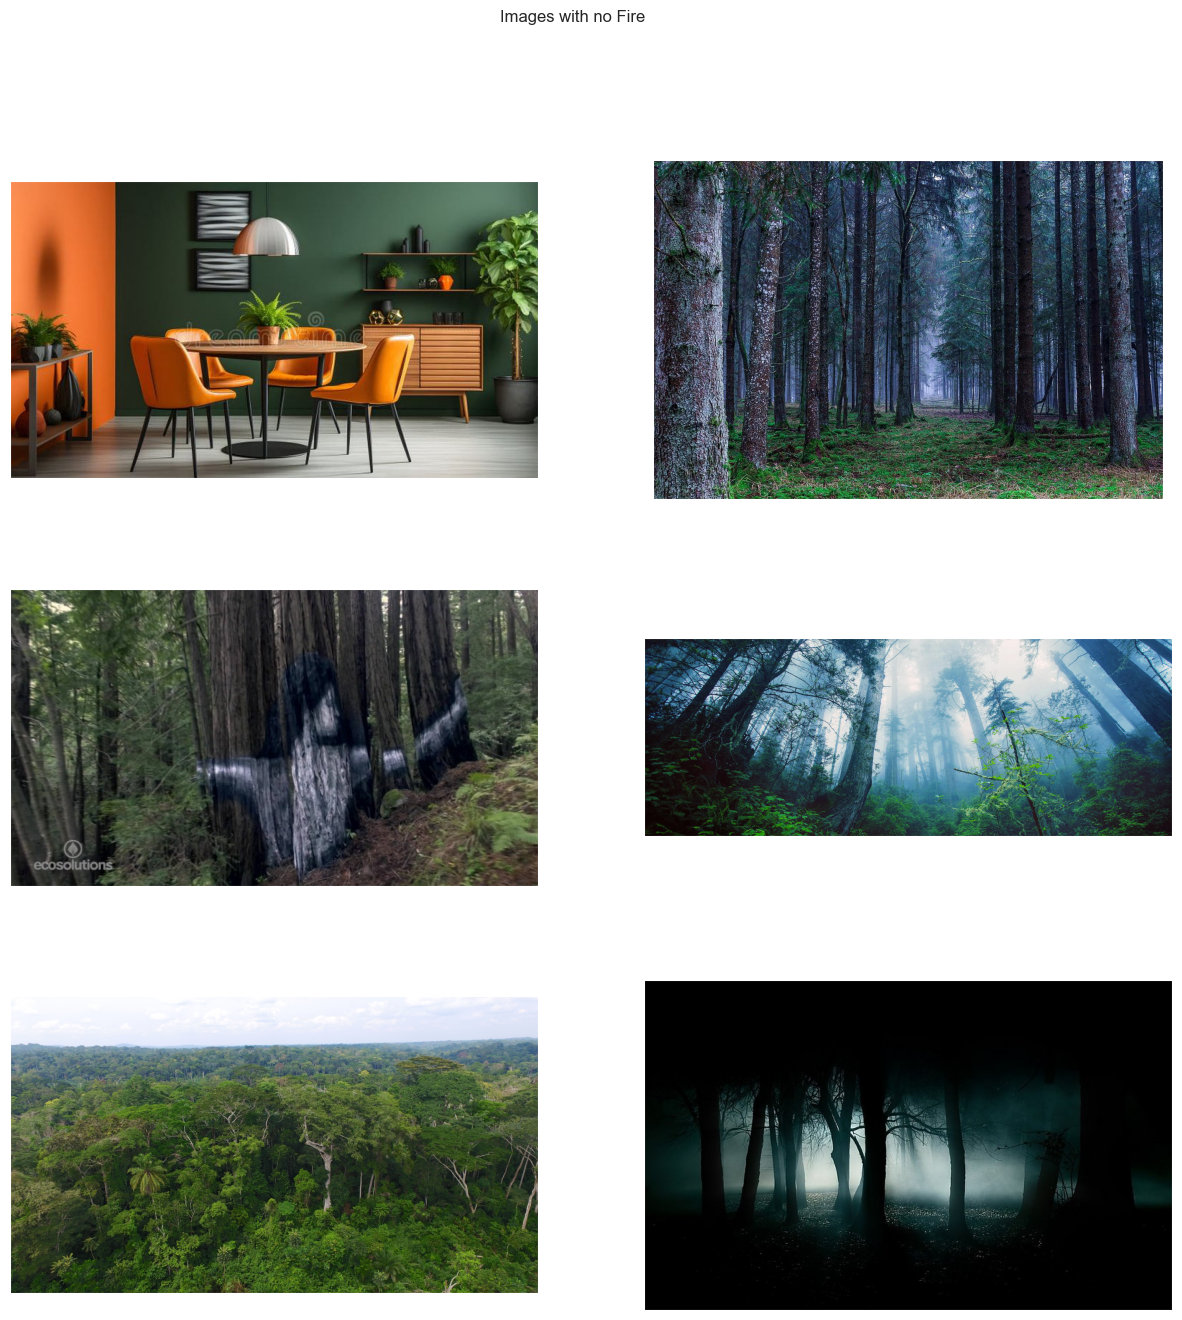

In [5]:
label = 'non_fire' 
data = df[df['label'] == label]
sns.set_style('dark')

pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with no Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

The distribution of images shape size

In [6]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(10)

path     label  height  width
0  ./fire_dataset/non_fire_images\non_fire.188.png  non_fire     304    540
1  ./fire_dataset/non_fire_images\non_fire.135.png  non_fire    1499   1000
2          ./fire_dataset/fire_images\fire.683.png      fire     300    917
3          ./fire_dataset/fire_images\fire.309.png      fire     365    648
4          ./fire_dataset/fire_images\fire.728.png      fire     540    960
5          ./fire_dataset/fire_images\fire.707.png      fire     415    622
6  ./fire_dataset/non_fire_images\non_fire.287.png  non_fire     224    224
7          ./fire_dataset/fire_images\fire.236.png      fire     172    292
8  ./fire_dataset/non_fire_images\non_fire.185.png  non_fire     403    600
9          ./fire_dataset/fire_images\fire.633.png      fire     555    986

# Visualizing Shape Distribution

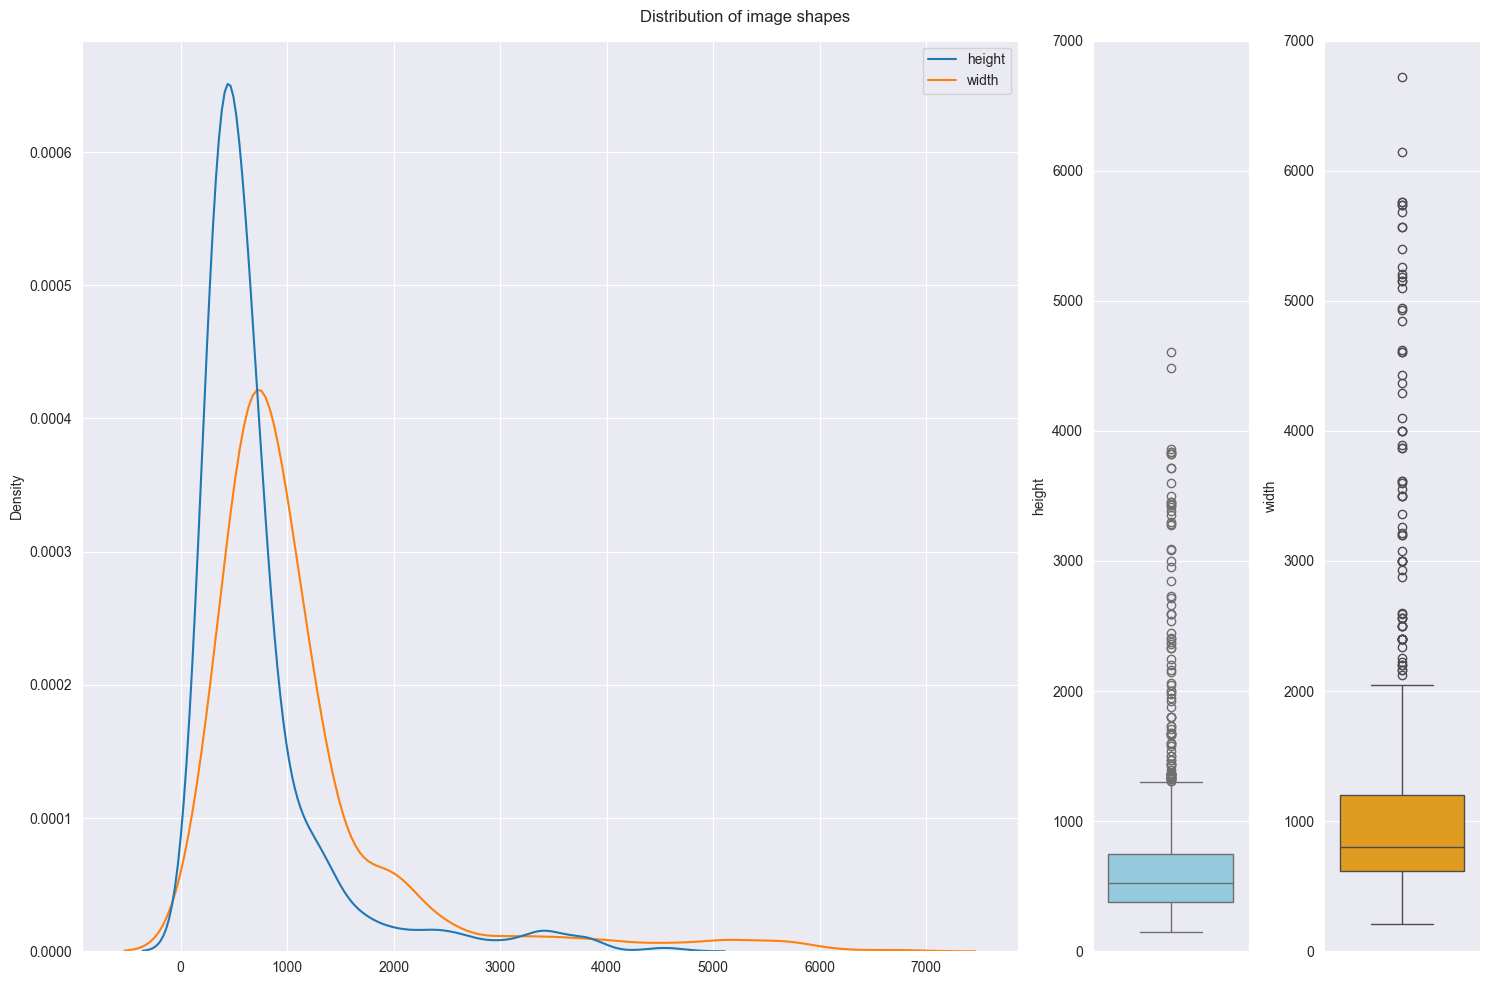

In [7]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

# Image Generator and Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

# Training & Test Generator

In [10]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')

Found 710 validated image filenames belonging to 2 classes.


In [11]:
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')

Found 177 validated image filenames belonging to 2 classes.


Indeces for classes that created by image generator

In [12]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


# Images in Training Set

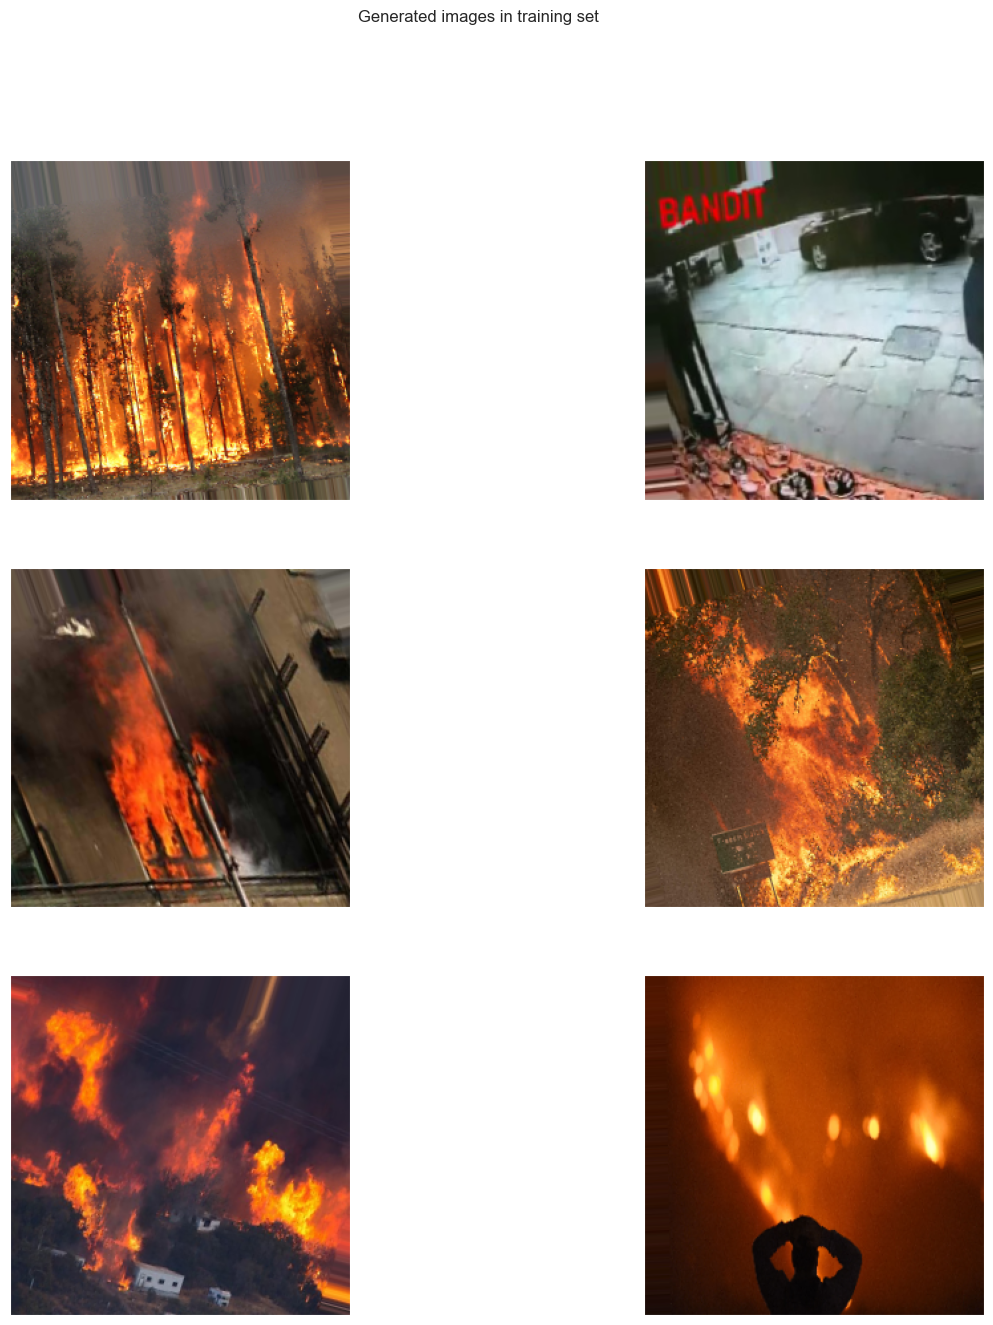

In [13]:
sns.set_style('dark')
pics = 6 
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

# Modelling

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [15]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 128)       0

Compiling Model

In [17]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [20]:
early_stoppping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)

# Model Fitting

In [21]:
history = model.fit(x=train_gen,batch_size=32,epochs=10,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])

Epoch 1/10


23/23 [==============================] - 32s 1s/step - loss: 0.5426 - accuracy: 0.7296 - recall: 0.5865 - auc: 0.7820 - val_loss: 0.3357 - val_accuracy: 0.8814 - val_recall: 0.8615 - val_auc: 0.9464 - lr: 0.0010
Epoch 2/10
23/23 [==============================] - 33s 1s/step - loss: 0.2565 - accuracy: 0.8986 - recall: 0.8397 - auc: 0.9564 - val_loss: 0.2980 - val_accuracy: 0.9266 - val_recall: 0.8154 - val_auc: 0.9546 - lr: 0.0010
Epoch 3/10
23/23 [==============================] - 43s 2s/step - loss: 0.2257 - accuracy: 0.9239 - recall: 0.8650 - auc: 0.9646 - val_loss: 0.2047 - val_accuracy: 0.9492 - val_recall: 0.9231 - val_auc: 0.9651 - lr: 0.0010
Epoch 4/10
23/23 [==============================] - 39s 2s/step - loss: 0.2078 - accuracy: 0.9113 - recall: 0.8608 - auc: 0.9686 - val_loss: 0.3469 - val_accuracy: 0.8927 - val_recall: 0.7077 - val_auc: 0.9540 - lr: 0.0010
Epoch 5/10
23/23 [==============================] - 40s 2s/step - loss: 0.2202 - accuracy: 0.9239 - recall

In [22]:
# Plotting training history
def plot_training_history(history):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.legend(loc='lower right')
    plt.title('Accuracy')
    plt.ylim(0, 1.0)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='orange')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='yellow')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.ylim(0, 4.0)

    plt.show()

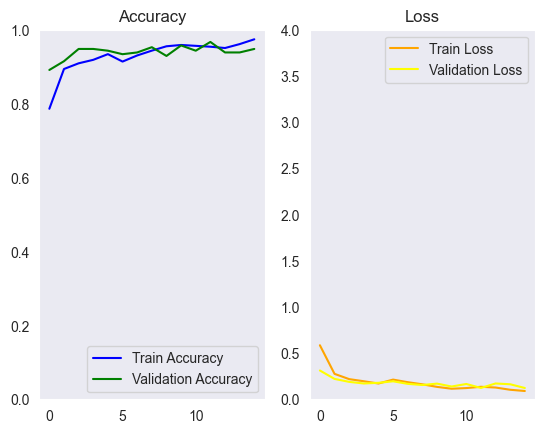

In [23]:
plot_training_history(history)

In [23]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

6/6 [==============================] - 4s 675ms/step - loss: 0.1574 - accuracy: 0.9605 - recall: 0.9231 - auc: 0.9771
loss: 0.16
accuracy: 0.96
recall: 0.92
auc: 0.98


# Prediction Testing

In [25]:
#Downloading the image
!curl https://i.ytimg.com/vi/whlymAuRtzU/maxresdefault.jpg --output predict1.jpg

!curl https://i.ytimg.com/vi/pc8eQZW9E8Q/maxresdefault.jpg --output predict2.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 79907  100 79907    0     0  87549      0 --:--:-- --:--:-- --:--:-- 87906
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  213k  100  213k    0     0   199k      0  0:00:01  0:00:01 --:--:--  200k


Print Image

In [24]:
#loading the image
img1 = image.load_img('predict1.jpg')
img2 = image.load_img('predict2.jpg')

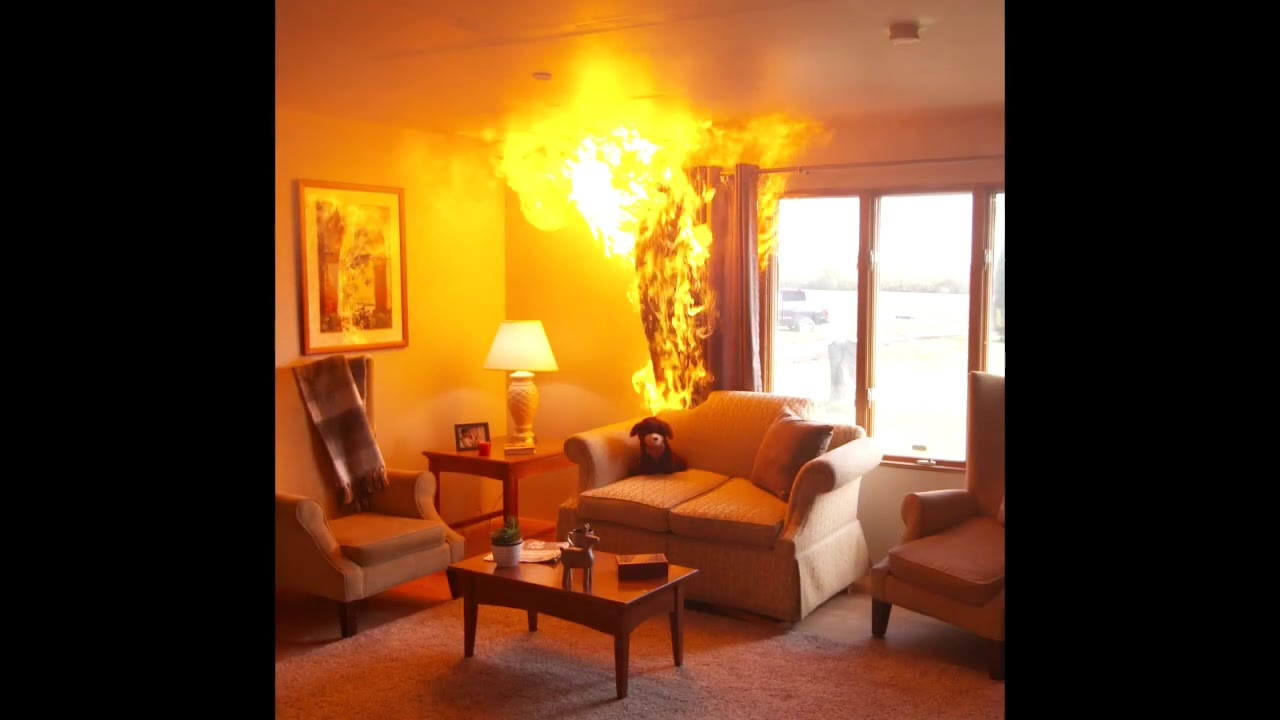

In [25]:
img1

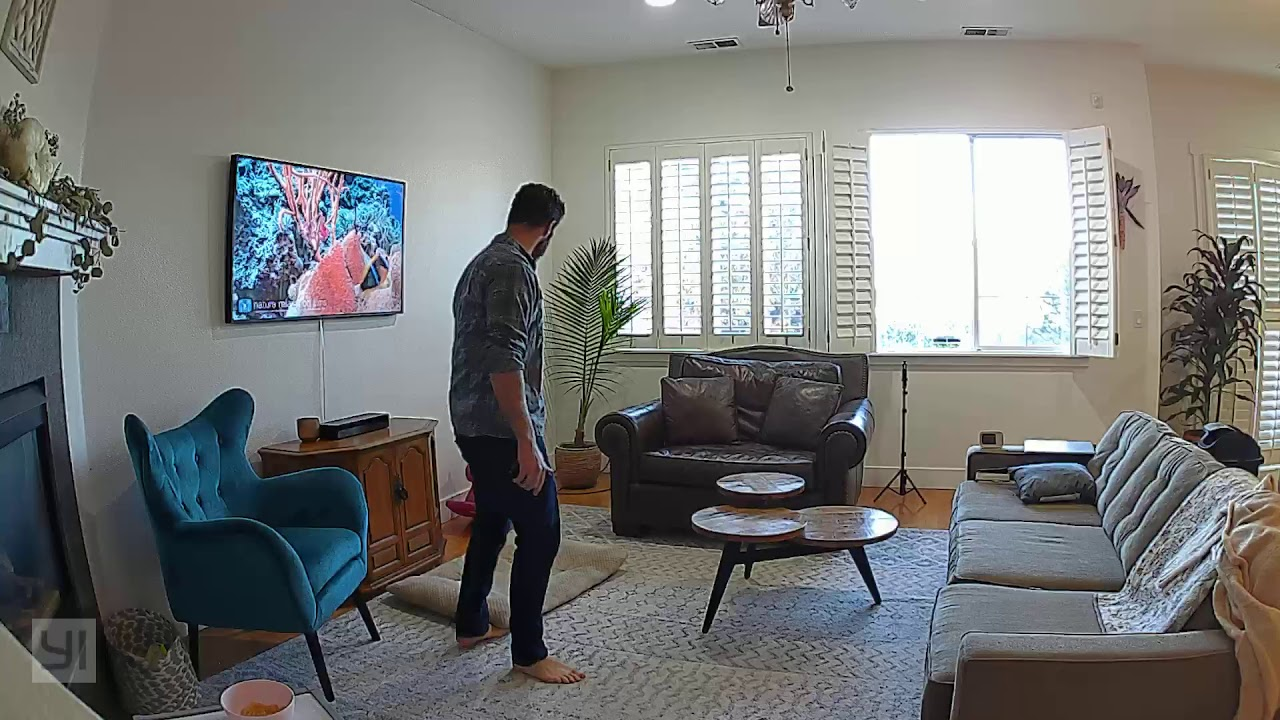

In [26]:
img2

Resizing the image and expanding its dimension to include the batch size - 1

In [27]:
img1 = image.img_to_array(img1)/255
img1 = tf.image.resize(img1,(256,256))
img1 = tf.expand_dims(img1, axis=0)

print("Image Shape",img1.shape)

Image Shape (1, 256, 256, 3)


In [28]:
img2 = image.img_to_array(img2)/255
img2 = tf.image.resize(img2,(256,256))
img2 = tf.expand_dims(img2, axis=0)

print("Image Shape",img2.shape)

Image Shape (1, 256, 256, 3)


Prediction

In [31]:
prediction1 = int(tf.round(model.predict(x=img1)).numpy()[0][0])
print("The predicted value is of prediction1: ",prediction1,"and the predicted label is:",class_indices[prediction1])

prediction2 = int(tf.round(model.predict(x=img2)).numpy()[0][0])
print("The predicted value is of prediction2: ",prediction2,"and the predicted label is:",class_indices[prediction2])

1/1 [==============================] - 0s 29ms/step
The predicted value is of prediction1:  0 and the predicted label is: fire
1/1 [==============================] - 0s 30ms/step
The predicted value is of prediction2:  1 and the predicted label is: non_fire


# Save Model

In [44]:
model.save('fire_detection_model.h5') 

c:\Users\Lattae\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
import tensorflow as tf

In [33]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Lattae\AppData\Local\Temp\tmptqpmtgsx\assets


INFO:tensorflow:Assets written to: C:\Users\Lattae\AppData\Local\Temp\tmptqpmtgsx\assets


In [34]:
# Save the model to a file
with open('fire_detection_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been successfully converted to TensorFlow Lite format and saved.")

Model has been successfully converted to TensorFlow Lite format and saved.


In [36]:
# Load model
# model = tf.keras.models.load_model('fire_detection_model.h5')

# Convert model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('fire_detection_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Lattae\AppData\Local\Temp\tmpscvruanr\assets


INFO:tensorflow:Assets written to: C:\Users\Lattae\AppData\Local\Temp\tmpscvruanr\assets


# Testing Using Video

In [64]:
%pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 3.0 MB/s eta 0:00:14
   ---------------------------------------- 0.2/38.8 MB 2.2 MB/s eta 0:00:18
   ---------------------------------------- 0.3/38.8 MB 2.3 MB/s eta 0:00:17
   ---------------------------------------- 0.4/38.8 MB 2.4 MB/s eta 0:00:16
    --------------------------------------- 0.6/38.8 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 0.8/38.8 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.9/38.8 MB 2.9 MB/s eta 0:00:13
   - -------------------------------------- 1.2/38.8 MB 3.2 MB/s eta 0:00:12
   - -------------------------------------- 1.4/38.8 MB 3.4 MB/s eta 0:00:11
   - -------------------------------------- 1.5/38.8 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.6/38.8 MB 3.2 MB/s eta 0:00:12
   - -------------------------------------- 1.8/38.8 MB 3.3 MB/s eta 0:00:12
   -- 


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [ ]:
# Load your trained model
model = tf.keras.models.load_model('fire_detection_model.h5')

In [39]:
# Load the TFLite model
tflite_model_path = 'fire_detection_model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)

In [40]:
# Allocate tensors
interpreter.allocate_tensors()

In [41]:
# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
# Set up class indices
class_indices = {0: 'fire', 1: 'non_fire'}

In [43]:
# Open a connection to the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame for your model
    img = cv2.resize(frame, (256, 256))
    img = img.astype('float32') / 255
    img = np.expand_dims(img, axis=0)

    # Set the tensor to the input data
    interpreter.set_tensor(input_details[0]['index'], img)

    # Run the interpreter
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = int(tf.round(output_data[0][0]).numpy())
    predicted_label = class_indices[prediction]

    # Set text color based on prediction
    if predicted_label == 'fire':
        text_color = (0, 0, 255)  # Red for fire
    else:
        text_color = (0, 255, 0)  # Green for non_fire

    # Display the resulting frame with prediction
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, f'Prediction: {predicted_label}', (10, 30), font, 1, text_color, 2, cv2.LINE_AA)
    cv2.imshow('Video', frame)

    # Break the loop on Enter key press
    if cv2.waitKey(1) & 0xFF == 13: 
        break

# When everything is done, release the capture and close windows
cap.release()
cv2.destroyAllWindows()